#**Netflix Movies And TV Shows Clustering**

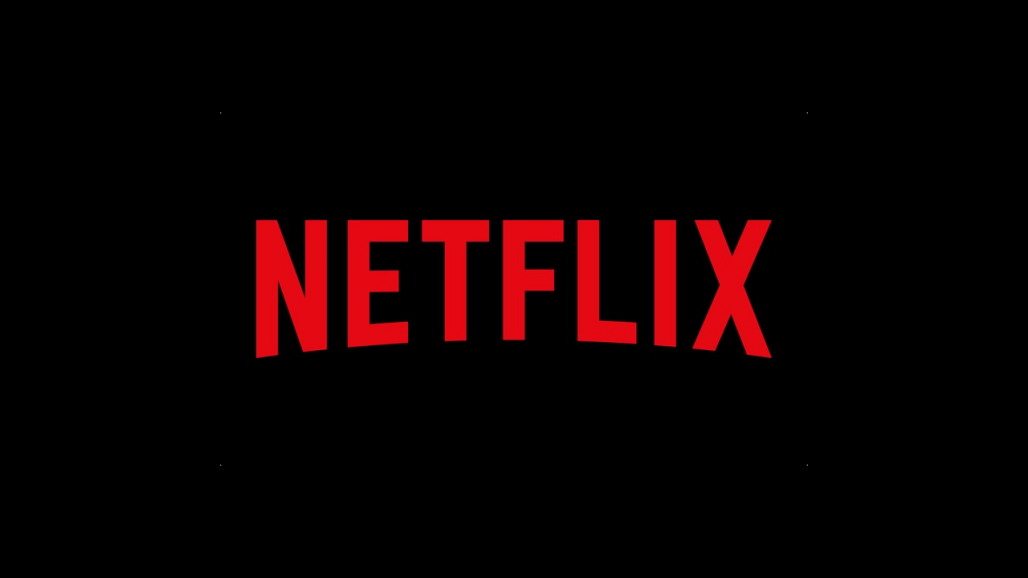


##**Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting finding.

##**Project Summary**

THE Netflix movies and TV shows clustering is a project where we shall  draw insights from our data and will clusterr our dataset into relevant cluster. We shall start by first knowing our data but before that we need to import important libraries.Once done we shall now start by mounting our drive and then loading  our dataset.

Once we have our dataset we shall go through shape and various columns to know what all our dataset contains* and what each column represent. We shall also go through description of column made available to us to know our dataset better.We have 7787 rows and 12 columns.

Now we shall move further to clean our dataset. To clean dataset we shall start by finding if there are any duplicate. But there are none so now we shall  find if there are any null value.Since our dataset contains null set we shall drop some colum and for some column we shall subsitute the values. I shall look at various columns and their unique value count ,this helps me in knowing if vatibale is of categorical type ,how many categories are there. I can fimd data tupe of coulmn using info method. In this datset we have 12 coulmns and out of these 12 , 11 are of type object and one column of type int. To know more about this numerical column Ihave ised describe ethod that helps me to know maximum,minimum value  count and mean and other parameters too

Now I shall be using graphs for visual representation and perform EDA using uni-variate,bi-varites..I shall finding be finding follwing information using graphs
* Type of content
* TOP 15 Netflix using countries
* Count of content realeased per year
* Different genre and their count
* Different kind of rating and their count
* Distribution of movies/shows according to months
* Distribution according to date
* Relationship between type of content and rating
* TOP 10 countries and their preference of content type
* Top 10 Genre of Movies
* Top 10 genre of Shows
* Top 15 actors on Netflix
* Distribution of duration of movies
* Most appeared words in title of Netflix content(WORDCLOUD)

Since cleaning is done EDA is done and we drawn conclusion about certain columns, it is time to pre process our data . I started by pre processing text by
* removing punctuation
* removing stopwords
* stemming
* tokenization

Once through with this process it is time to implement our model. I shall be creating two variables for storing length of text in description column and listed_in columnn and then rescaling it.Also we have done PCA(princpal compnent analysis)

Once done we shall impement our model and find out best value of k,I shall be using followinf methods

* Elbow Method
* Hierarchical Clustering
* Agglomerative hierarchical Clustering

After this we shall conclude our project and write some insights

##**Github Link**

**Importing important libraries**

In [ ]:

# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

**Mounting the drive**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

**Downloading the dataset**

In [3]:
pth='/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df_movie = pd.read_csv(pth)

**Creating the copy of dataset**

In [4]:
df= df_movie.copy()

In [ ]:
# Top 5 rows of dataset
df.head()

In [ ]:
# Last 5 rows
df.tail()

In [6]:
df.shape

(7787, 12)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Description of columns**
1.show_id : Unique ID for every Movie / Tv Show

2.type : Identifier - A Movie or TV Show

3.title : Title of the Movie / Tv Show

4.director : Director of the Movie

5.cast : Actors involved in the movie / show

6.country : Country where the movie / show was produced

7.date_added : Date it was added on Netflix

8.release_year : Actual Releaseyear of the movie / show

9.rating : TV Rating of the movie / show

10.duration : Total Duration - in minutes or number of seasons

11.listed_in : Genere

12.description: The Summary description


In [90]:
# it shows about only numerical column
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

**Checking for duplicate values**

In [7]:
# To find duplicates
df_movie.duplicated().value_counts()

False    7787
dtype: int64

In [8]:
# Let us see what how many unique value each column has
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

**Now we shall look for null values and handle them if any**

In [9]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null values: {}%".format(i,round(null_rate,2)))


director null values: 30.68%
cast null values: 9.22%
country null values: 6.51%
date_added null values: 0.13%
rating null values: 0.09%


Text(0.5, 1.0, 'NULL Value in Dataset')

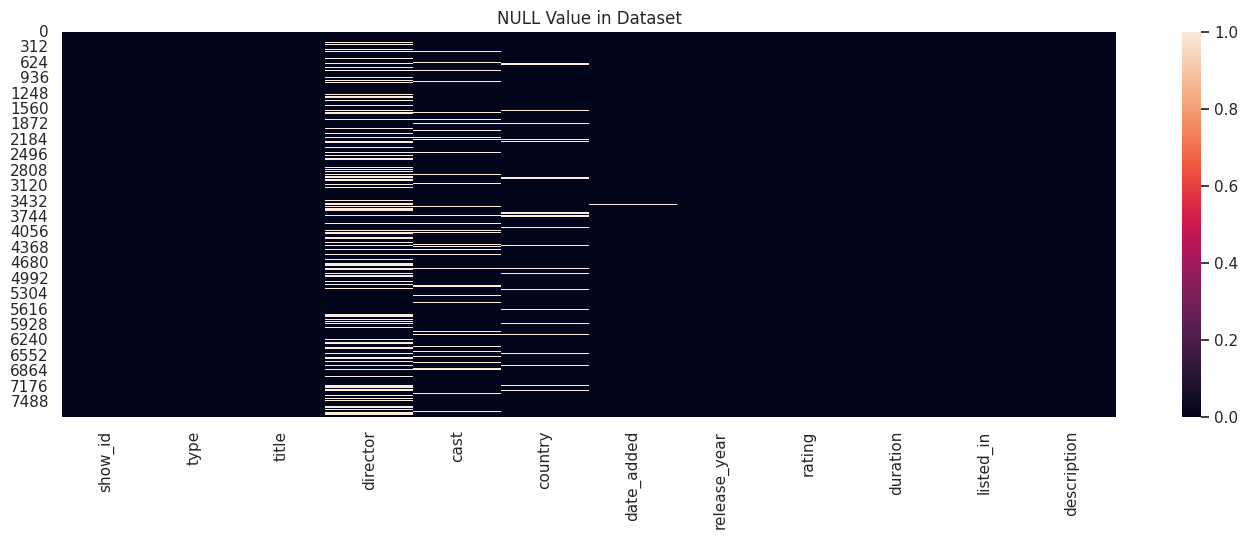

In [10]:
# visual representation of null values of our  dataset
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True)
plt.title('NULL Value in Dataset')

Since there are almost 30% null values in director column we fill it with 'unknown' value.

NULL cast values shall be replaced by 'unknown' value

NULL country values shall be replaced byunknown'value

NULL rating values with mode value

date_added column's null values will be dropped

In [11]:

#Handling of Missing Values
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)



In [12]:
df.shape

(7777, 12)

In [13]:
# Create new features to store date, day, month and year seperately.
df['date_added'] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] =df['date_added'].dt.year          # Compute year.
df['month_added'] =df['date_added'].dt.month        # Compute month.


##**EXPLORATARY DATA ANALYSIS**

**Type of content in Netflix**

In [14]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

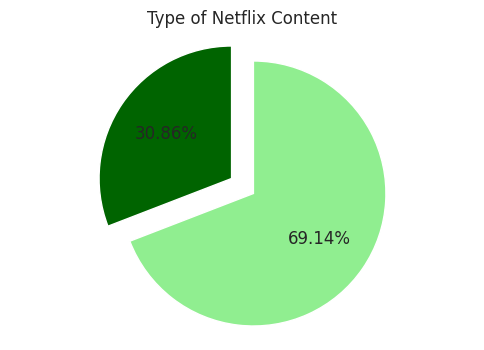

In [15]:
#Plotting pie chart on type feature
plt.figure(figsize=(6,4))

plt.pie(df['type'].value_counts().sort_values(),explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['darkgreen','lightgreen'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()


69% of content on netflix is movies and 31% is TV Show

**TOP 15 Netflix using countries**

In [16]:
country_count = df.country.value_counts().sort_values(ascending = False)[:15]
country_count

United States     2549
India              923
Unknown            506
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Turkey             100
Australia           82
Taiwan              78
Brazil              72
Name: country, dtype: int64

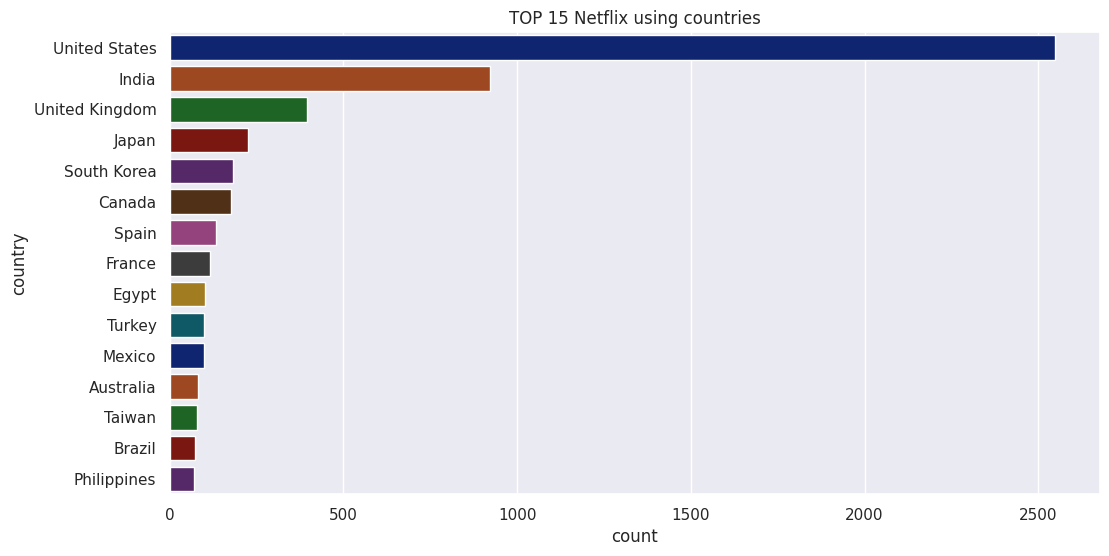

In [17]:
# visual representation
plt.figure(figsize=(12,6))
sns.countplot(y='country', palette = 'dark',order= df_movie.country.value_counts().index[0:15], data= df)
plt.title("TOP 15 Netflix using countries")
plt.show()


UNITED STATES being the top most country using Netflix followed by INDIA

**Count of content realeased per year**

In [18]:
df['release_year'].value_counts()[:15]

2018    1120
2017    1012
2019     996
2016     881
2020     868
2015     539
2014     334
2013     266
2012     218
2010     172
2011     166
2009     137
2008     124
2007      85
2006      85
Name: release_year, dtype: int64

<Axes: xlabel='release_year', ylabel='count'>

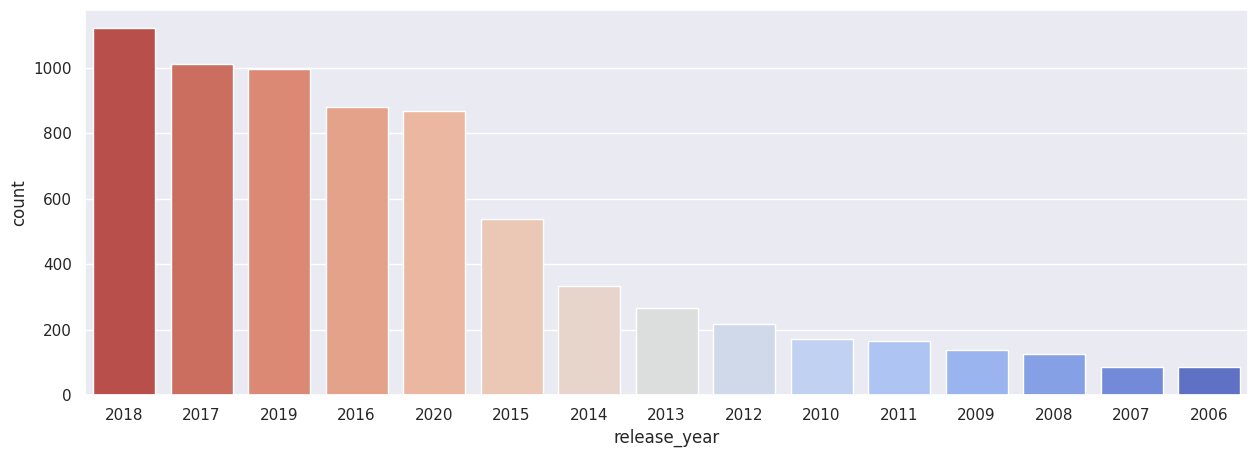

In [19]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(x=df['release_year'],data=df,order=df_movie['release_year'].value_counts().index[0:15], palette="coolwarm_r")

**Different genre and their count**

In [20]:
genre_count = df['listed_in'].value_counts()
genre_count[:15]

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Comedies, International Movies, Romantic Movies     139
Action & Adventure, Dramas, International Movies    117
Dramas                                              117
International TV Shows, TV Dramas                   111
Name: listed_in, dtype: int64

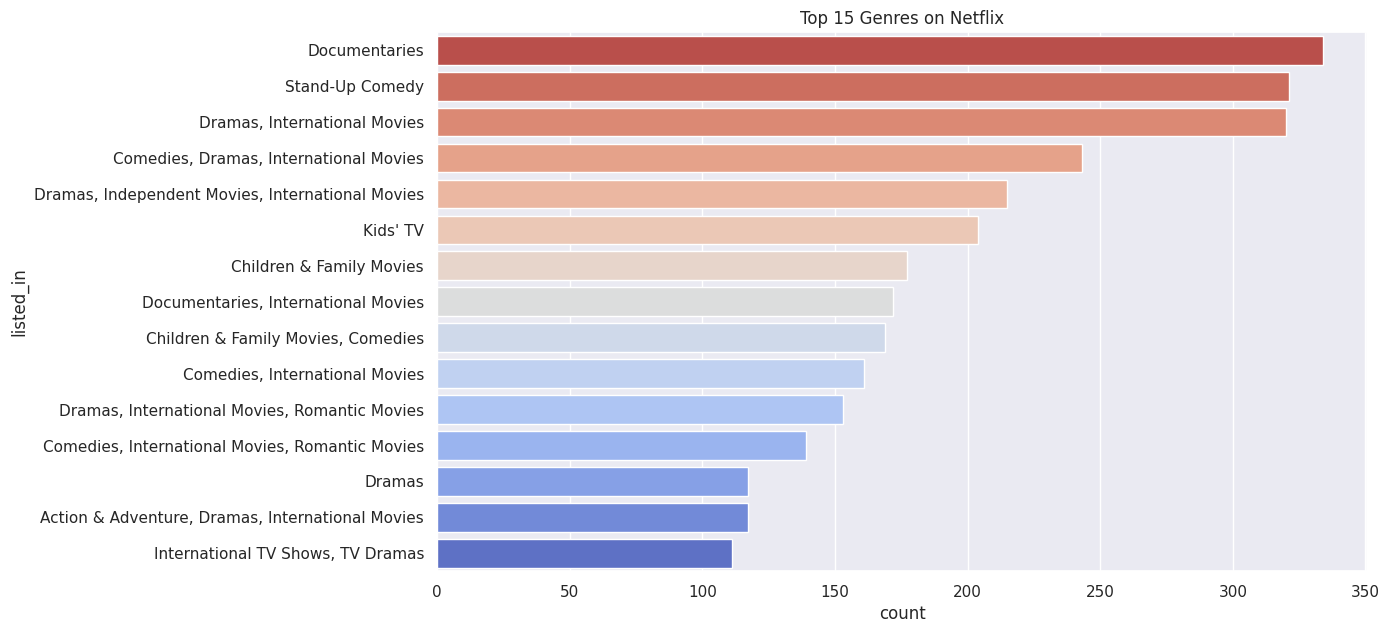

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(y ="listed_in", order= df_movie["listed_in"].value_counts().index[0:15], data=df, palette="coolwarm_r")
plt.title("Top 15 Genres on Netflix")
plt.show()

**Different kind of rating and their count**

In [22]:
df.rating.value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

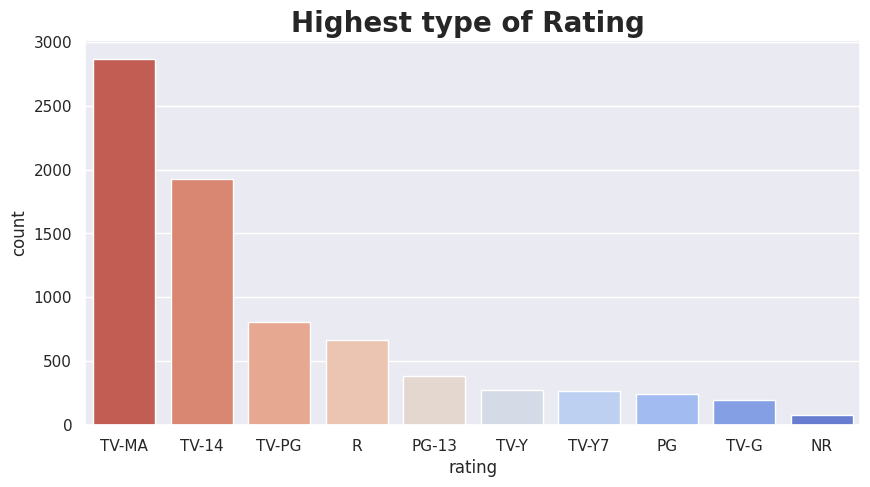

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.rating, order= df["rating"].value_counts().index[0:10],palette='coolwarm_r')
plt.title("Highest type of Rating ", fontsize=20, fontweight='bold')
plt.show()

**Distribution of movies/shows according to months**

Text(0.5, 12.444444444444487, 'month_added')

<Figure size 1200x800 with 0 Axes>

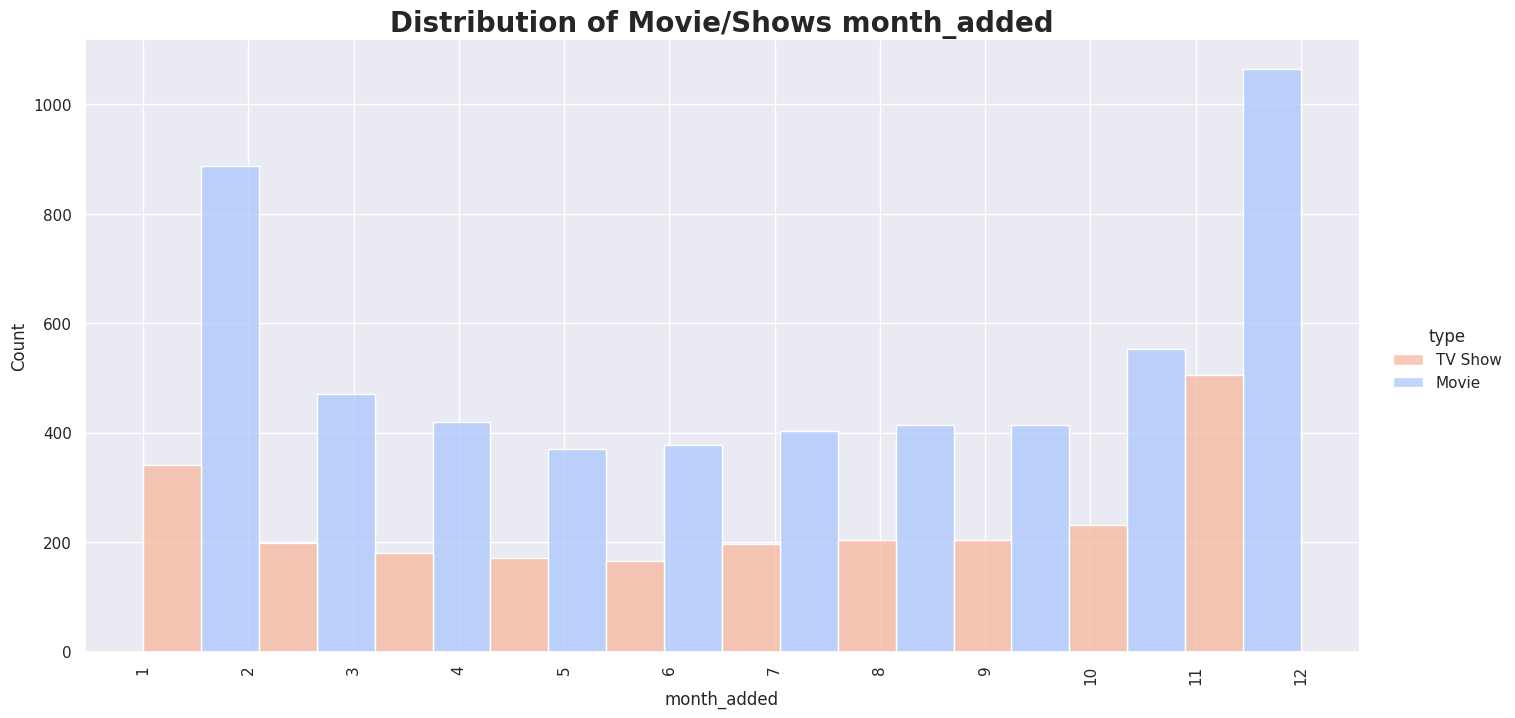

In [24]:
plt.figure(figsize=(12,8))
sns.displot(x='month_added', hue = 'type', data = df, kind = 'hist', height=7, aspect=2, multiple='dodge',bins=10, palette='coolwarm_r')
plt.xticks(ticks= np.arange(df.month_added.min(),df.month_added.max()+1,1), rotation = 90)
plt.title('Distribution of Movie/Shows month_added', fontsize=20, fontweight='bold')
plt.xlabel('month_added')

Most of the Movies/TV Shows were added in the month of December and January.

Number of Movies added on Netflix are more as compared to TV Shows throughout the year.

**Distribution according to date**

Text(0.5, 12.444444444444487, 'date_added')

<Figure size 1400x800 with 0 Axes>

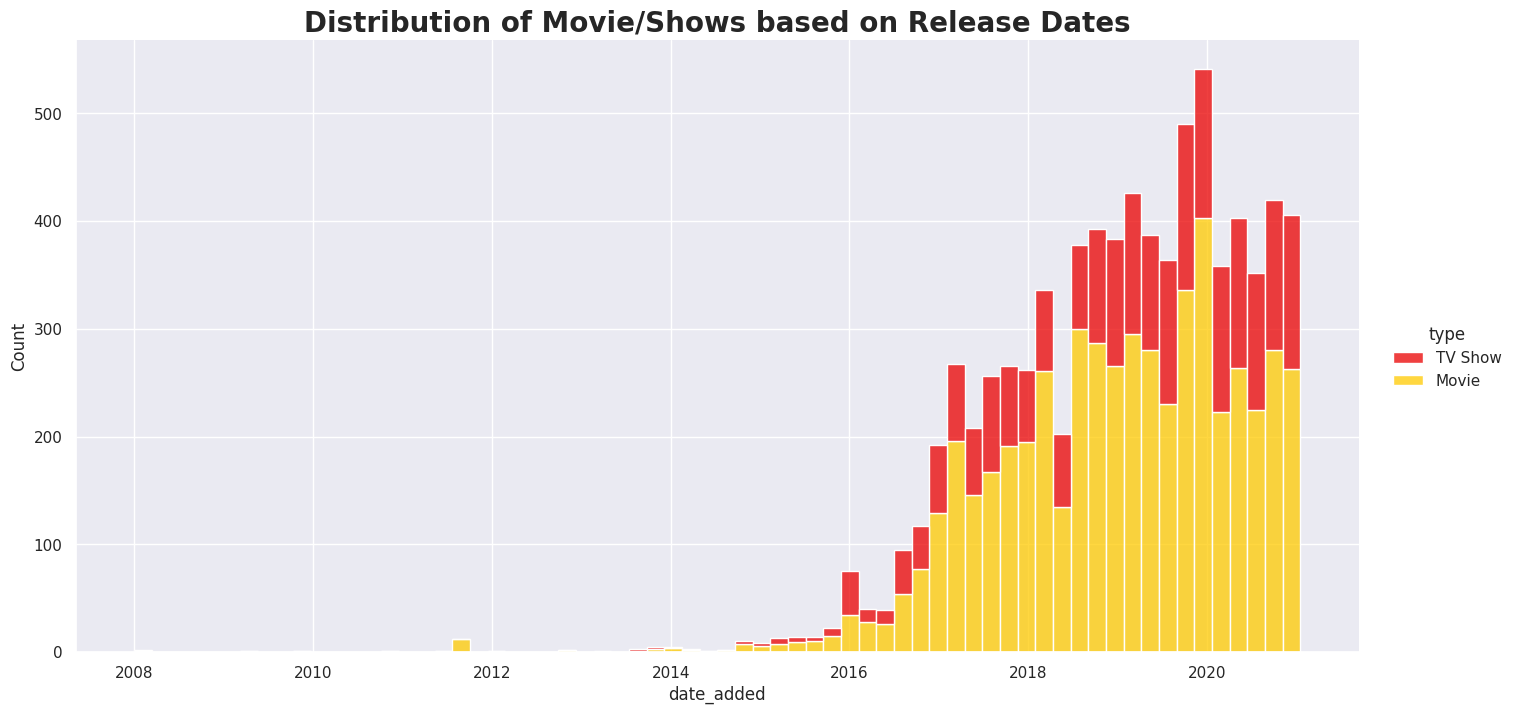

In [25]:
#Distribution of Movie/Shows based on date added
plt.figure(figsize=(14,8))
sns.displot(x='date_added', hue = 'type', data = df, kind = 'hist', height=7, aspect=2, multiple='stack', palette='hot')

plt.title('Distribution of Movie/Shows based on Release Dates', fontsize=20, fontweight='bold')
plt.xlabel('date_added')


**Relationship bettween type of content and rating**

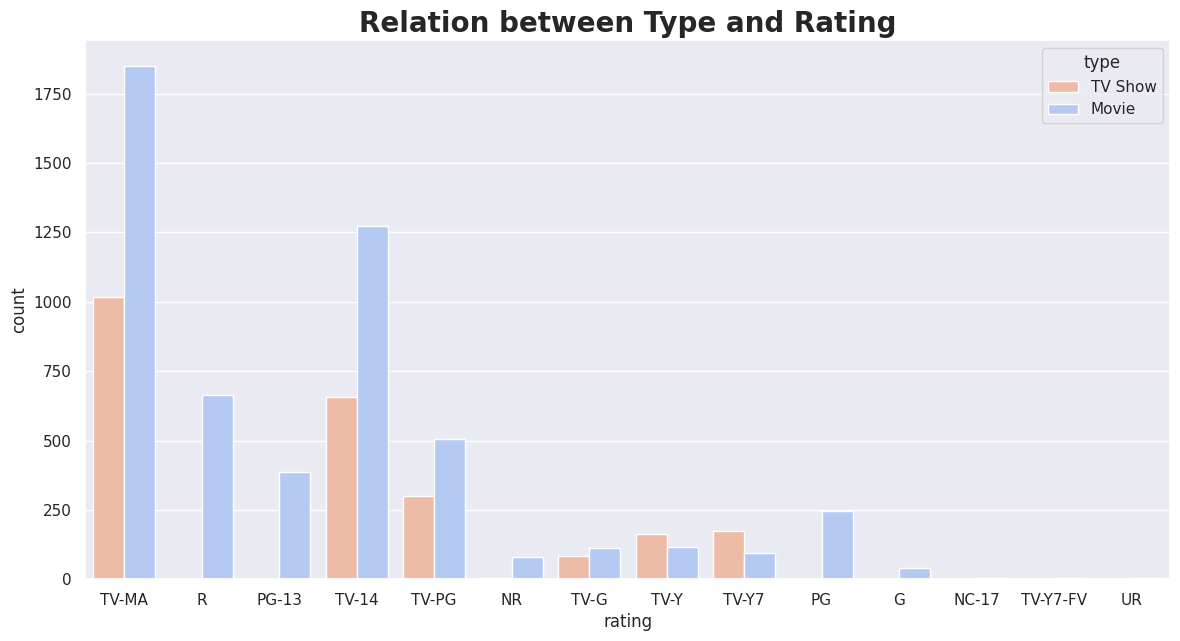

In [26]:
#Type with Rating
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=df, palette='coolwarm_r')
plt.title('Relation between Type and Rating', fontsize=20, fontweight='bold')
plt.show()


**TOP 10 countries and their preference of content type**

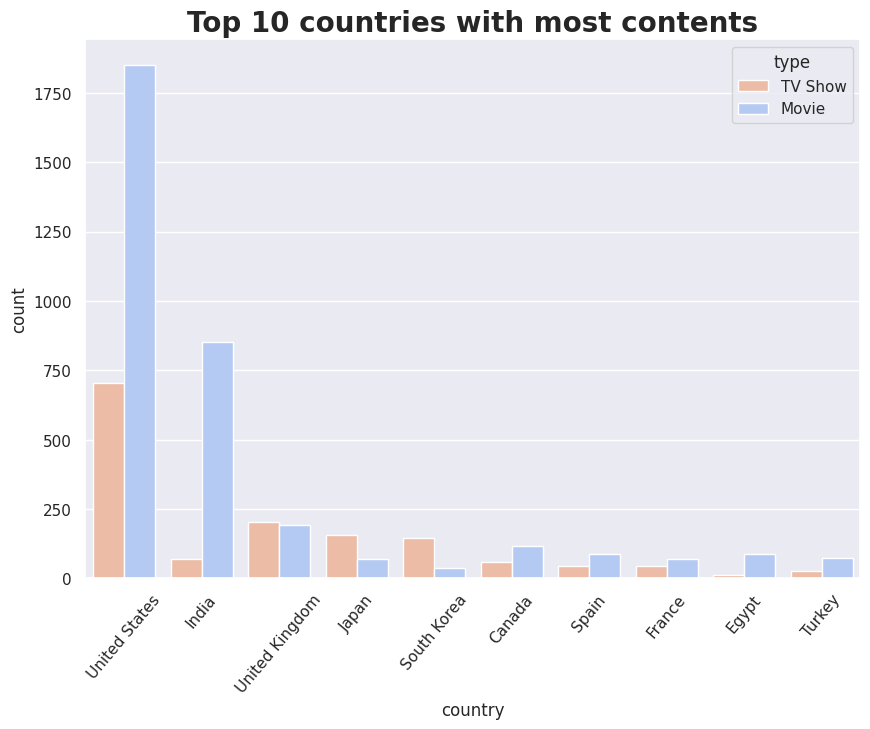

In [27]:
#Analysing top10 countries with most content
plt.figure(figsize=(10,7))
sns.countplot(x=df_movie['country'],palette="coolwarm_r",order=df_movie['country'].value_counts().index[0:10],hue=df_movie['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=20, fontweight='bold')
plt.show()

**Top 10 Genre of Movies**

In [28]:

netflix_shows=df_movie[df_movie['type']=='TV Show']
netflix_movies=df_movie[df_movie['type']=='Movie']

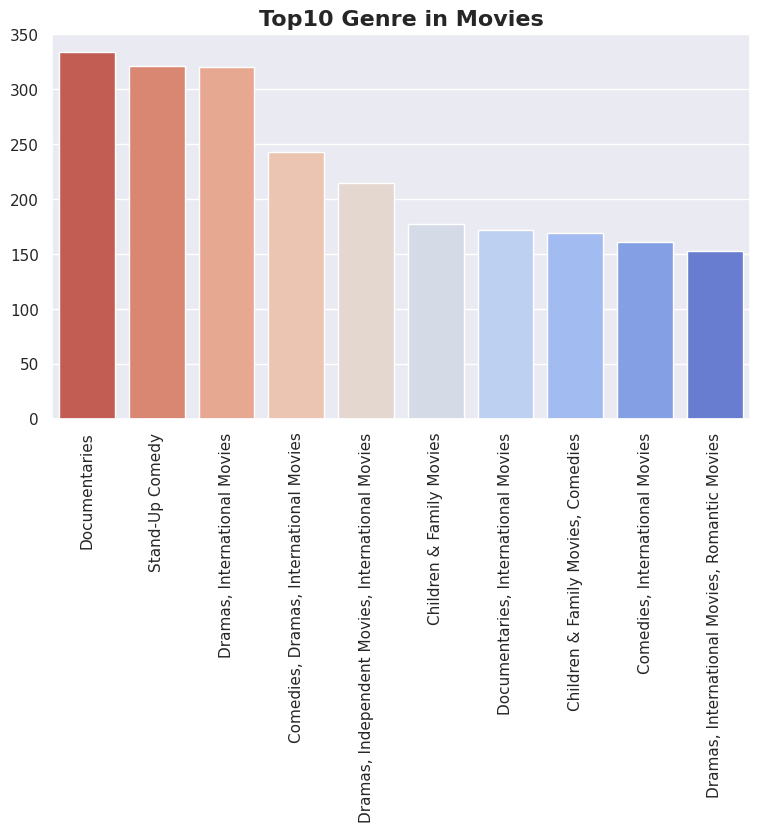

In [29]:
plt.figure(figsize=(9,5))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,y =netflix_movies["listed_in"].value_counts().head(10).values,palette="coolwarm_r")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()


**Top 10 genre of Shows**

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

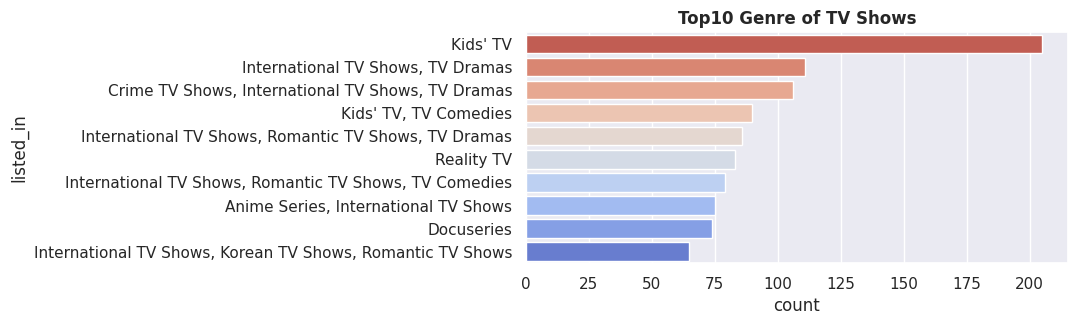

In [30]:
plt.figure(figsize=(7,3))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=netflix_shows['listed_in'],data=netflix_shows,order=netflix_shows['listed_in'].value_counts().index[0:10],palette="coolwarm_r")

**Top 15 actors on Netflix**

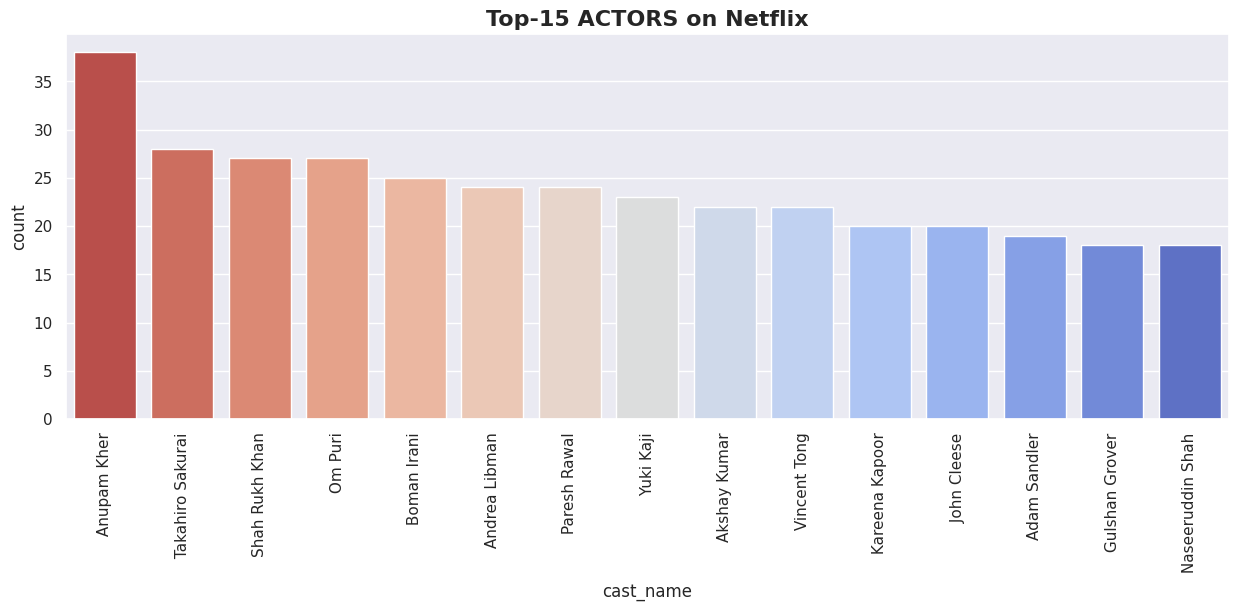

In [31]:
df['cast_name'] = df['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:16]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="coolwarm_r")
plt.title("Top-15 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

**Distribution of movies**

In [32]:
#Distribution of duration of movies
df_movie['duration']=df_movie['duration'].str.replace('Season','')
df_movie['duration']=df_movie['duration'].str.replace('s','')
df_movie['duration']=df_movie['duration'].str.replace('min','')
df_movie['duration']=df_movie['duration'].astype(str).astype(int)
df_movie['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int64

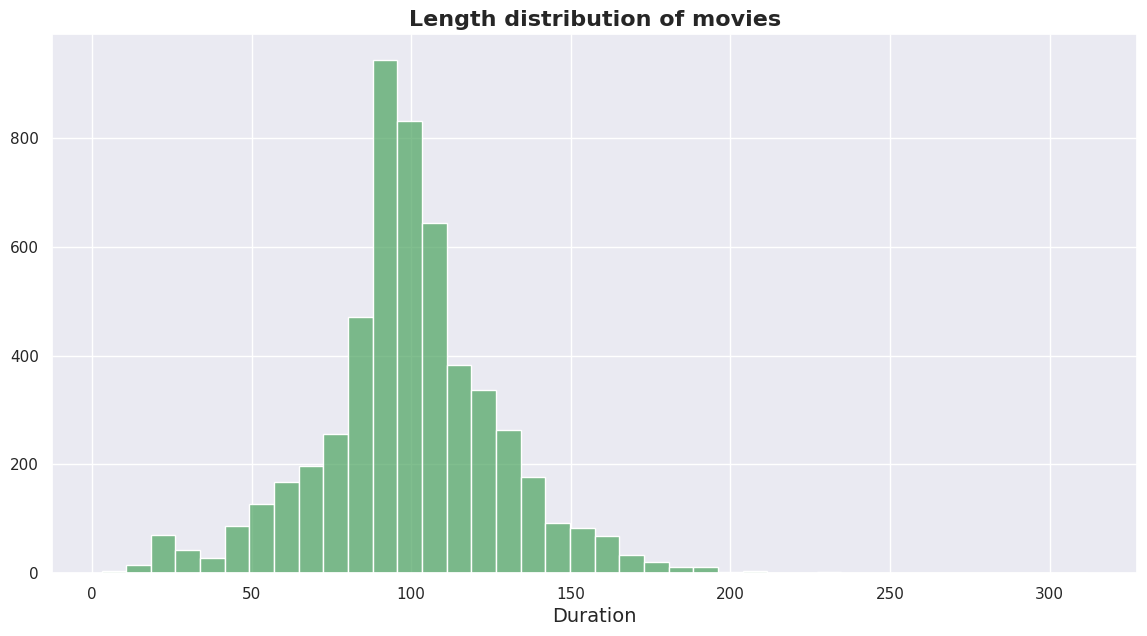

In [33]:
# Length distribution of movies
movies = df_movie[df_movie['type']=='Movie']
plt.figure(figsize=(14, 7))
sns.histplot(movies['duration'], bins=40,color='g').set(ylabel=None)
plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

Duration ojn an average is between 90mins-120mins.

**Word Cloud for title**

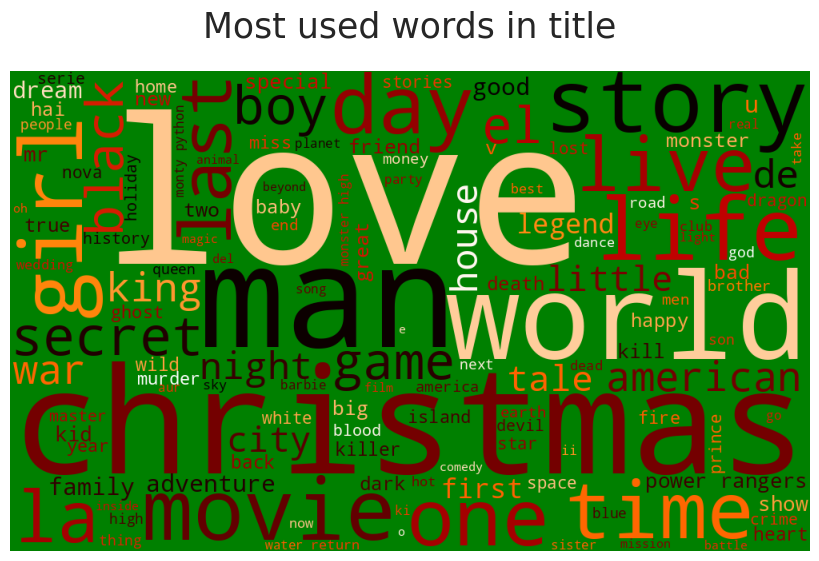

In [34]:


from wordcloud import WordCloud, STOPWORDS
#  Create a string to store all the words :
comment_words = ''
# Remove the stopwords :

stopwords = set(STOPWORDS)
# iterate through the column :

for val in df_movie.title:
  # typecaste each val to string :

    val = str(val)
 # split the value :

    tokens = val.split()

    # Converts each token into lowercase :

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='green',
                stopwords = stopwords,
                min_font_size = 15,
                max_words = 900,
                colormap = 'gist_heat_r').generate(comment_words)

# plot the WordCloud image  :

plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 25, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

###**Text Pre-Processing**


Text preprocessing is a method to clean the text data and make it ready to feed data to the model. Text data contains noise in various forms like emotions, punctuation, text in a different case. When we talk about Human Language then, there are different ways to say the same thing, And this is only the main problem we have to deal with because machines will not understand words, they need numbers so we need to convert text to numbers in an efficient manner.

Expand Contractions
Lower Case
Remove Punctuations
Remove words and digits containing digits
Remove Stopwords
Rephrase Text
Stemming and Lemmatization
Remove White spaces

In [35]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = df.copy()


In [36]:
df1.fillna('',inplace=True)

In [37]:
# adding all necessary column into one column
df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [38]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

**Function to remove non ascii characters**

In [39]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words



In [20]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])



In [12]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

**Removing Stop Words**

In [62]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [41]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [42]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [43]:
df1['clustering_attributes'][40]

'muharrem gülmez erdem yener, ayhan taş, emin olcay, muharrem gülmez, elif nur kerkük, tarık papuççuoğlu, suzan aksoy, doğa konakoğlu, esin eden, deniz özerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

**Remove Punctuation**

In [44]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [45]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [46]:
df1['clustering_attributes'][40]

'muharrem gülmez erdem yener ayhan taş emin olcay muharrem gülmez elif nur kerkük tarık papuççuoğlu suzan aksoy doğa konakoğlu esin eden deniz özerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

**Lemmatization**

In [47]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


In [48]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [49]:

df1['clustering_attributes'][40]

'muharrem gülmez erdem yener ayhan taş emin olcay muharrem gülmez elif nur kerkük tarık papuççuoğlu suzan aksoy doğa konakoğlu esin eden deniz özerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

**Tokenisation**

In [50]:
tokenizer = TweetTokenizer()

In [51]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [52]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [54]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [55]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 238723 stored elements in Compressed Sparse Row format>

In [56]:
X.shape


(7777, 20000)

In [57]:
# data type of vector
type(X)


scipy.sparse._csr.csr_matrix

In [58]:
X = X.toarray()


**Principal Component Analysis**

In [59]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X)

PCA()

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

Text(0, 0.5, 'cumulative explained variance')

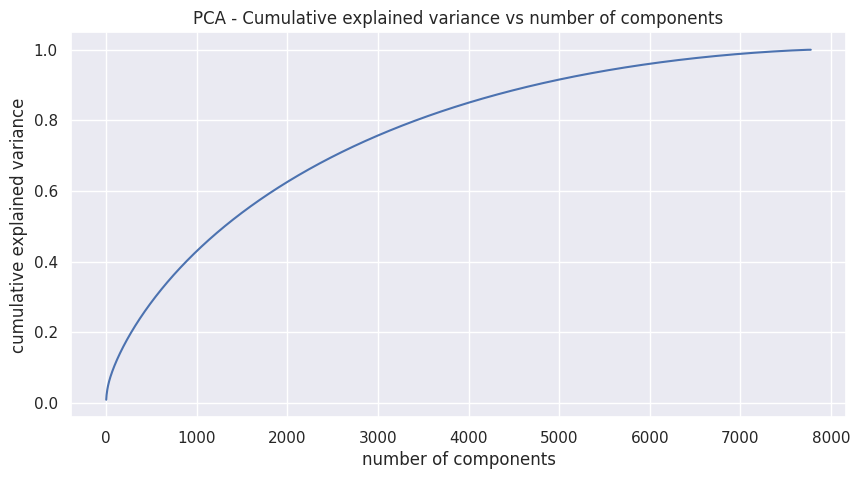

In [34]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


We find that 100% of the variance is explained by about ~7500 components.

Also, more than 80% of the variance is explained just by 4000 components.

Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [36]:
# reducing the dimensions to 4000 using pca
transformer = PCA(n_components=4000,random_state=42)
transformer.fit(X)


PCA(n_components=4000, random_state=42)

In [37]:
# transformed features
x_transformer = transformer.transform(X)


In [39]:
x_transformer.shape

(7777, 4000)

Dimensionality has been reduced





**K-Means Clustering:**


**Building clusters using the K-means clustering algorithm.**

**Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.**

Text(0, 0.5, 'WCSS')

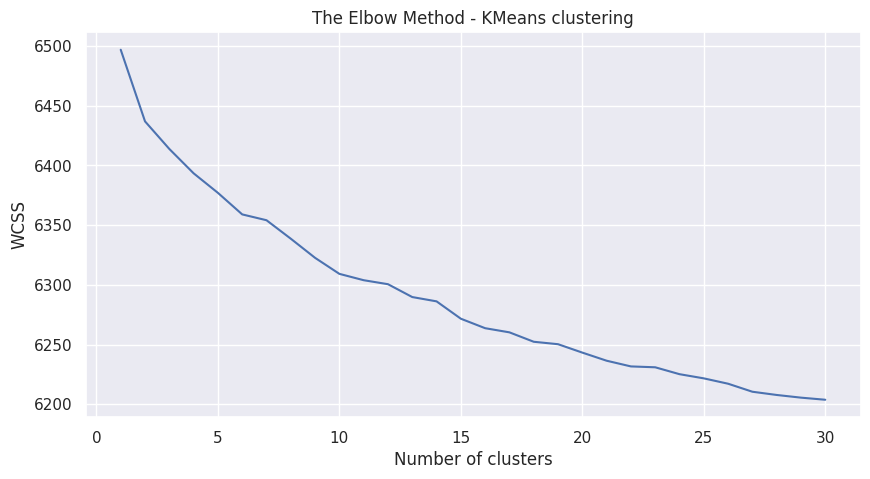

In [41]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_transformer)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


**Observation: With increase in number of cluster wcss(sum squared distance )between centroid decreases**

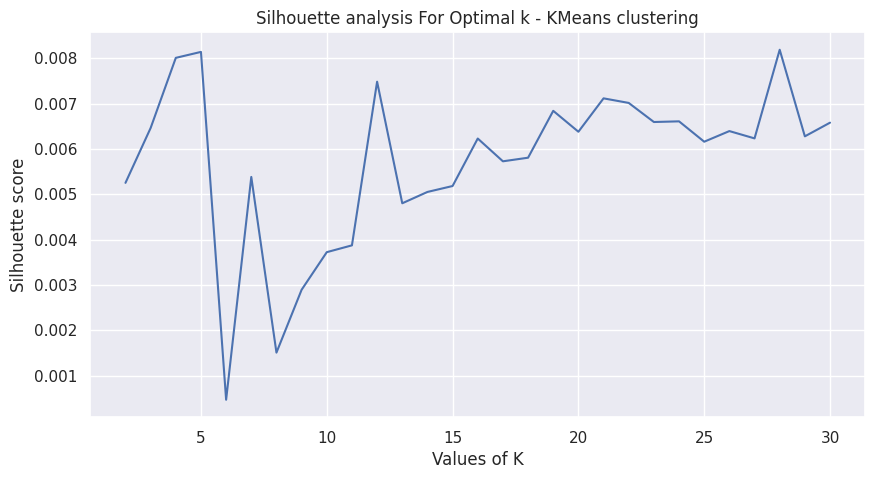

In [42]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_transformer)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_transformer, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 6 clusters.

Building 6 clusters using the k-means clustering algorithm:

In [43]:
#  Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_transformer)

KMeans(n_clusters=6, random_state=33)

In [44]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_transformer, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))


(6359.022506600239, 0.00046647481669688577)


In [45]:
# Adding a kmeans cluster attribute
df1['kmeans_cluster'] = kmeans.labels_

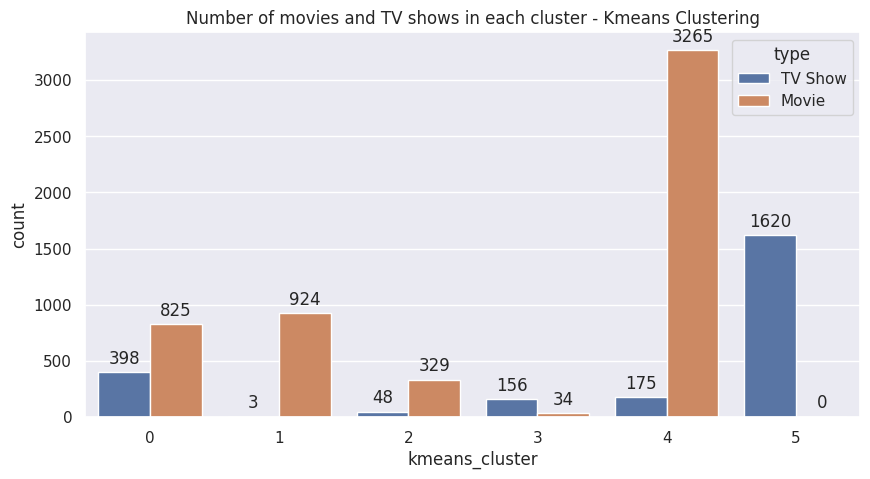

In [46]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [47]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='black',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)


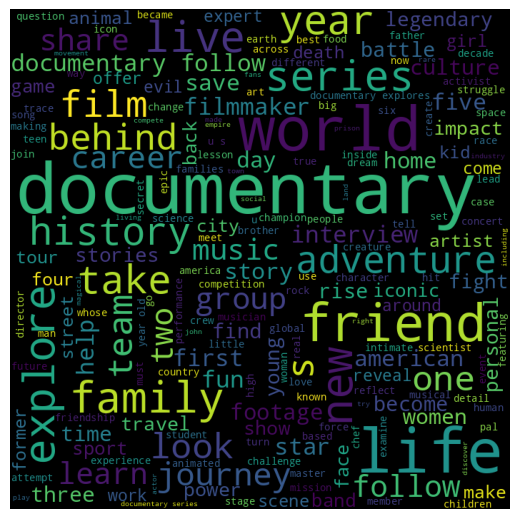

In [48]:
#  Wordcloud for cluster 0
kmeans_worldcloud(0)

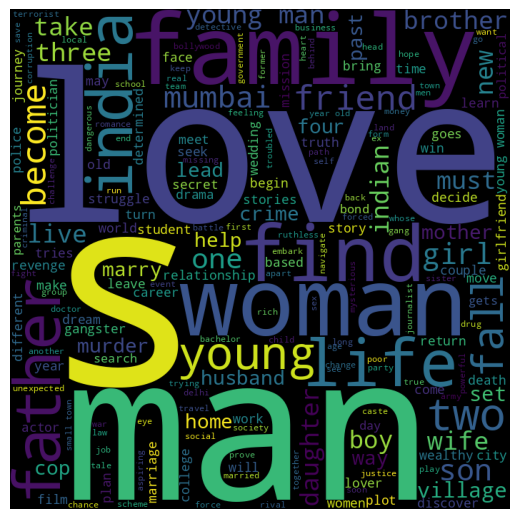

In [49]:
#  Wordcloud for cluster
kmeans_worldcloud(1)

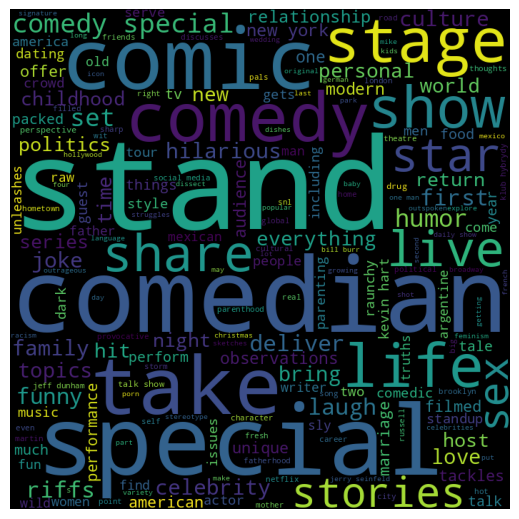

In [50]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

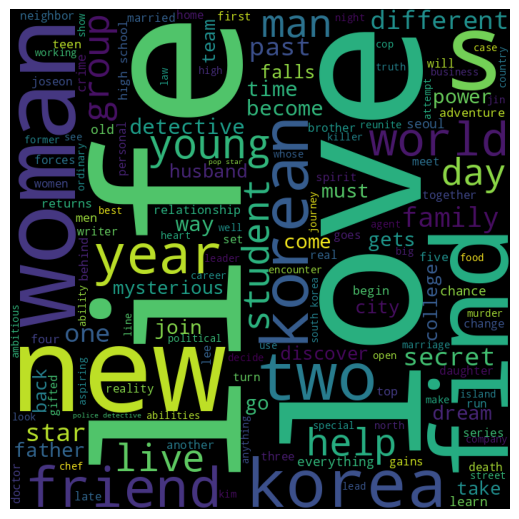

In [51]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)


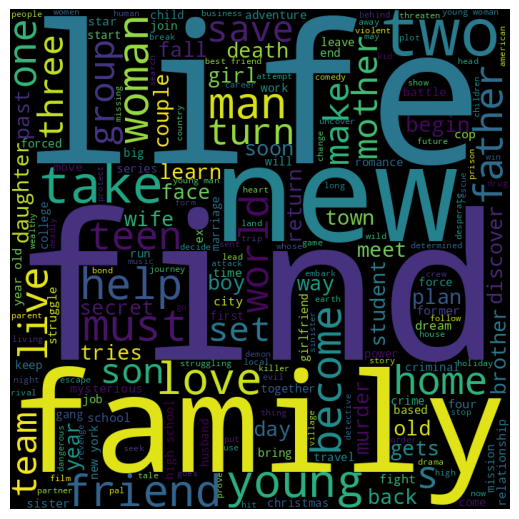

In [52]:

# Wordcloud for cluster 4
kmeans_worldcloud(4)

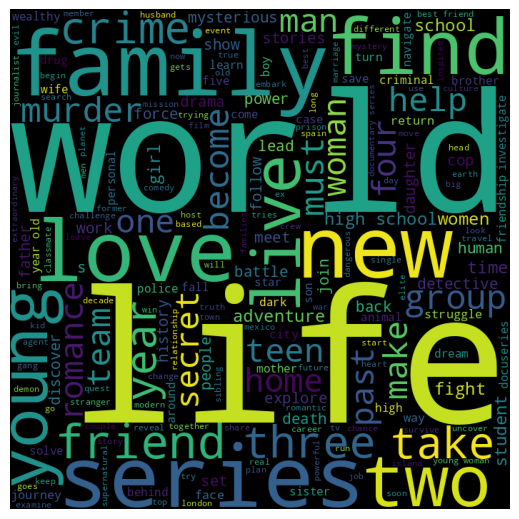

In [53]:

# Wordcloud for cluster 5
kmeans_worldcloud(5)

**Let's implement Hierarchical Clustering**

Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

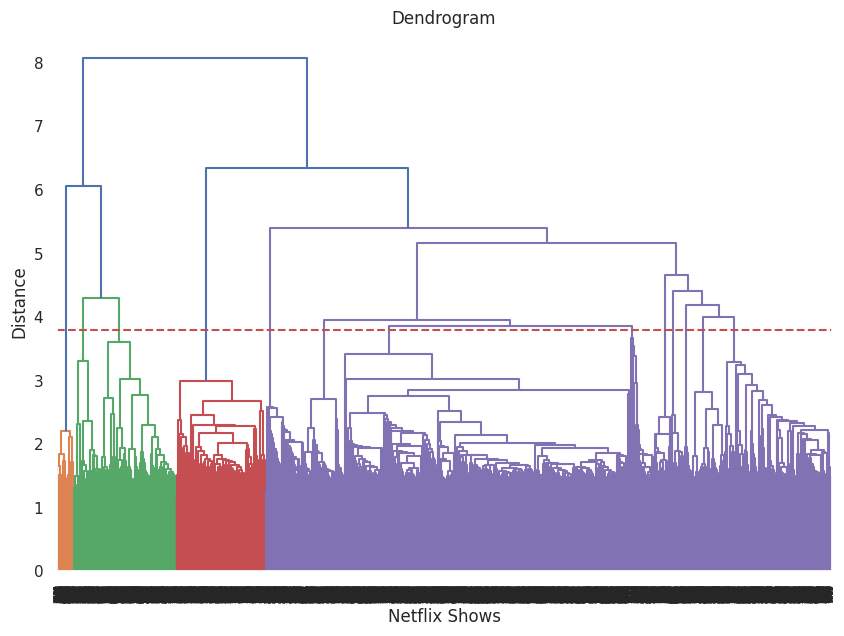

In [54]:

# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_transformer, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')


In [ ]:

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_transformer)

In [56]:
df1['hierarchical_cluster'] = hierarchical.labels_

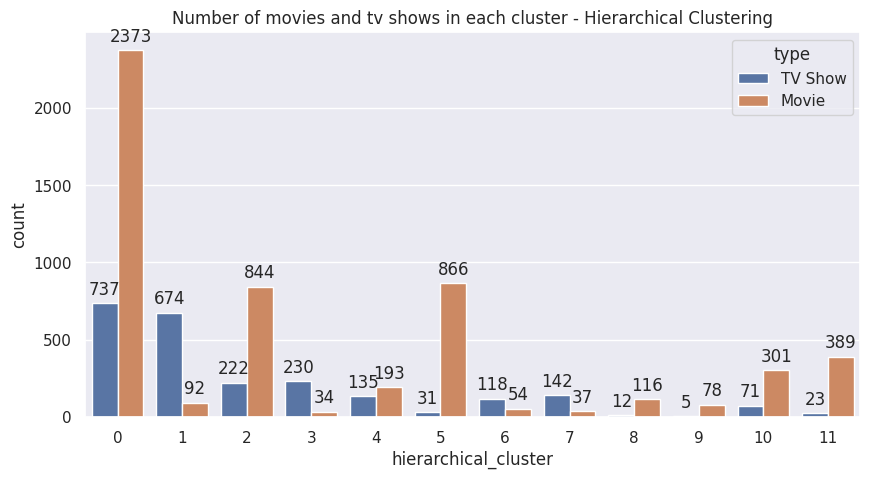

In [57]:
#  Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [59]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='black',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

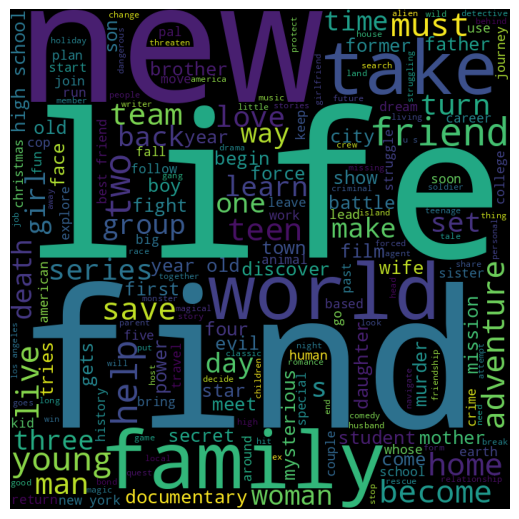

In [61]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

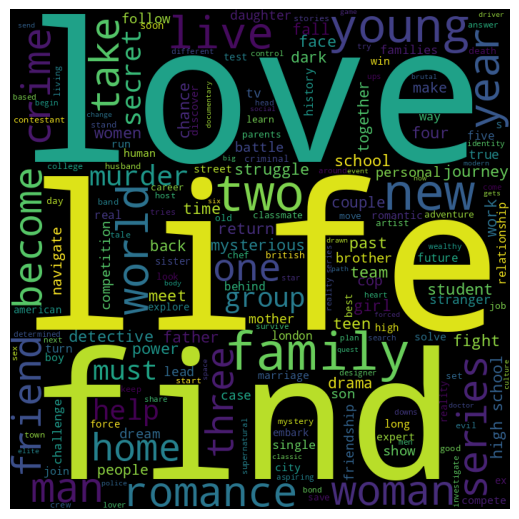

In [63]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

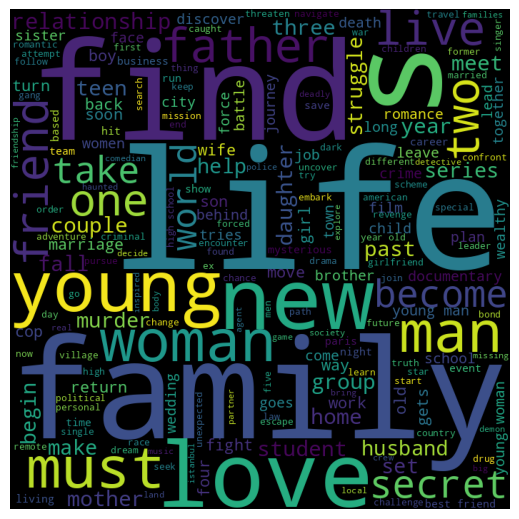

In [64]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

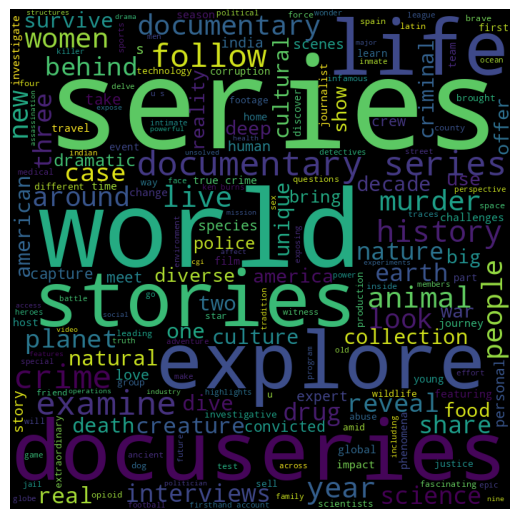

In [65]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

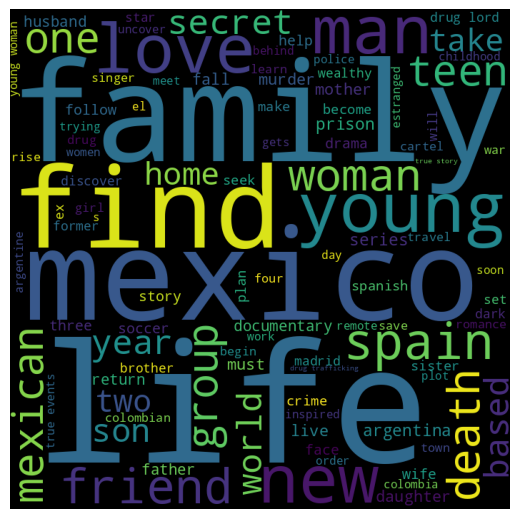

In [66]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

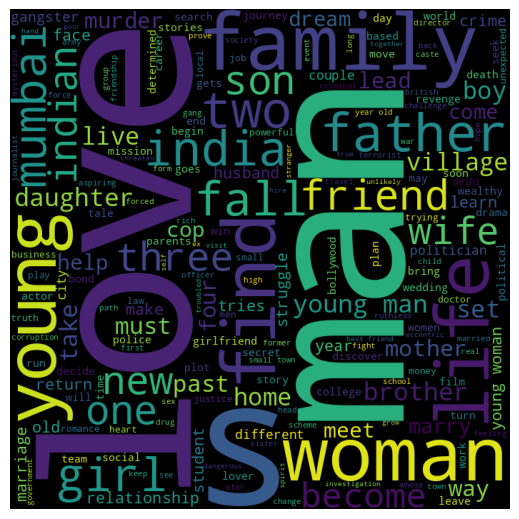

In [67]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

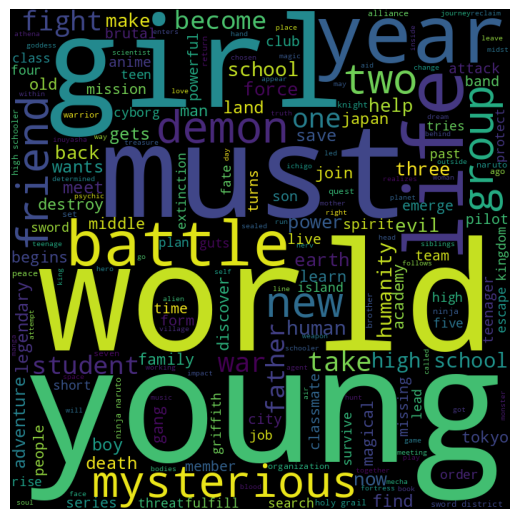

In [68]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

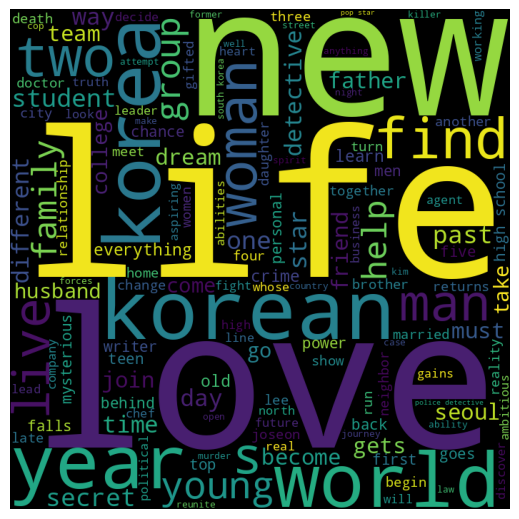

In [69]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

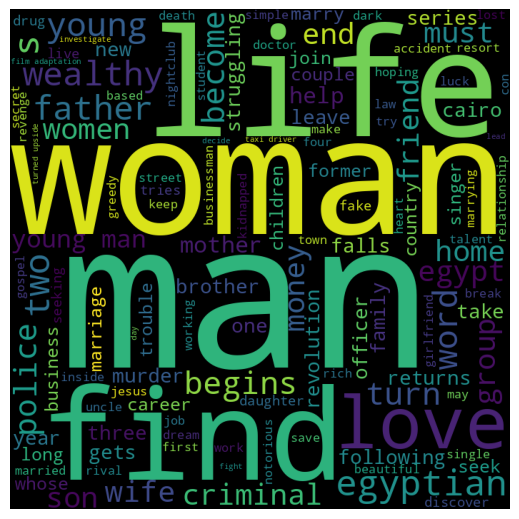

In [71]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

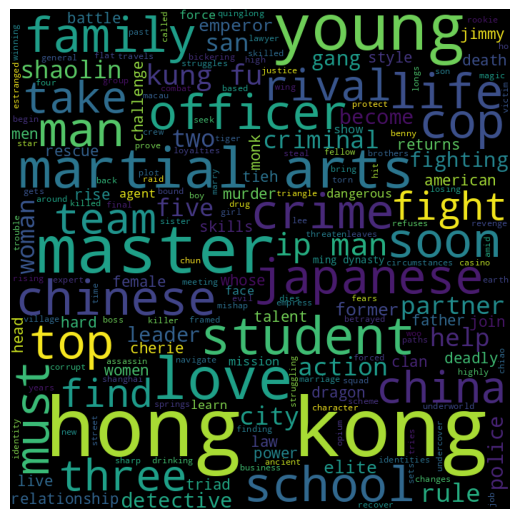

In [72]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

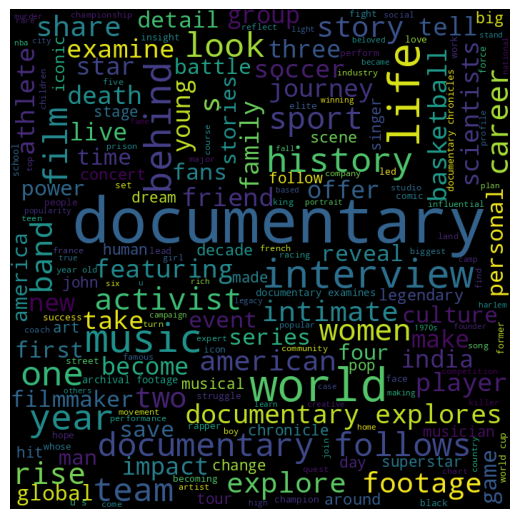

In [74]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

**Content based recommender system:**

In [75]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [76]:

# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [77]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [78]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [79]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [80]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [81]:
cosine_similarity.shape

(7777, 7777)

In [82]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'



In [83]:
# Recommendations for 'A Man Called God'(example)
recommend_10(' A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Little Baby',
 'My Mister',
 'The Lies Within',
 'Extracurricular',
 'Chef & My Fridge',
 'My Secret Romance']

**Conclusions:**

In this project, we worked on a text clustering problem wherein we had to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 12 attributes.

We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

 We had performed lots of operations over the dataset to find out some very useful information from it. Netflix has more Movies than TV shows.


  Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

Most of the number of Movies and TV shows produced by United States followed by India.

Most of the Content on Netflix (Movies and TV shows combined) is highest in year 2018

Majority of the movies range in length from 90 to 120 minutes and the majority of TV shows have only one season.


Dramas, International movies are the most popular Genres on Netflix.

Most of title have words like christmas,love,girl common.

When it comes to movie documentaries is most like genre and in case of shows kid's Tv

It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

Through TFIDF Vectorization, we created a total of 20000 attributes.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.

We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will show 10 recommendation We had performed lots of operations over the dataset to find out some very useful information from it. Netflix has more Movies than TV shows.

